In [1]:
import pandas as pd
file_path=r"C:\Users\Νικολέτα\Downloads\archive (1)\fifa_players.csv"
df=pd.read_csv(file_path)

In [2]:
df

,name,full_name,birth_date,age,height_cm,weight_kgs,positions,nationality,overall_rating,potential,...,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle
0,L. Messi,Lionel Andrés Messi Cuccittini,6/24/1987,31,170.18,72.1,"CF,RW,ST",Argentina,94,94,...,94,48,22,94,94,75,96,33,28,26
1,C. Eriksen,Christian Dannemann Eriksen,2/14/1992,27,154.94,76.2,"CAM,RM,CM",Denmark,88,89,...,89,46,56,84,91,67,88,59,57,22
2,P. Pogba,Paul Pogba,3/15/1993,25,190.50,83.9,"CM,CAM",France,88,91,...,82,78,64,82,88,82,87,63,67,67
3,L. Insigne,Lorenzo Insigne,6/4/1991,27,162.56,59.0,"LW,ST",Italy,88,88,...,84,34,26,83,87,61,83,51,24,22
4,K. Koulibaly,Kalidou Koulibaly,6/20/1991,27,187.96,88.9,CB,Senegal,88,91,...,15,87,88,24,49,33,80,91,88,87
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17949,R. McKenzie,Rory McKenzie,10/7/1993,25,175.26,74.8,"RM,CAM,CM",Scotland,67,70,...,54,69,41,60,64,63,56,40,20,18
17950,M. Sipľak,Michal Sipľak,2/2/1996,23,182.88,79.8,LB,Slovakia,59,67,...,22,62,55,42,39,32,52,53,64,60
17951,J. Bekkema,Jan Bekkema,4/9/1996,22,185.42,89.8,GK,Netherlands,59,67,...,9,27,10,5,25,16,47,9,12,13
17952,A. Al Yami,Abdulrahman Al Yami,6/19/1997,21,175.26,64.9,"ST,LM",Saudi Arabia,59,71,...,58,38,15,54,52,50,53,16,18,17


In [4]:
df.isnull().sum()

name                                 0
full_name                            0
birth_date                           0
age                                  0
height_cm                            0
weight_kgs                           0
positions                            0
nationality                          0
overall_rating                       0
potential                            0
value_euro                         255
wage_euro                          246
preferred_foot                       0
international_reputation(1-5)        0
weak_foot(1-5)                       0
skill_moves(1-5)                     0
body_type                            0
release_clause_euro               1837
national_team                    17097
national_rating                  17097
national_team_position           17097
national_jersey_number           17097
crossing                             0
finishing                            0
heading_accuracy                     0
short_passing            

In [8]:
##undervalued Players
df['potential_diff']=df['potential']-df['overall_rating']
undervalued = df.sort_values(by=['potential_diff', 'value_euro'], ascending=[False, True])

In [11]:
undervalued[['full_name','overall_rating','potential','value_euro']].head(10)

,full_name,overall_rating,potential,value_euro
5433,Mohamed Daramy,54,80,150000.0
6126,Simon Sohm,57,83,210000.0
6140,Troy Parrott,57,83,230000.0
6495,Julian von Moos,58,84,280000.0
4929,Slavi Spasov,49,74,70000.0
5049,Herman Geelmuyden,51,76,80000.0
4546,Jorge García,55,80,180000.0
5655,Bali Mumba,55,80,190000.0
7809,Alessio Riccardi,61,86,550000.0
5095,Jacob Akanyirige,51,75,70000.0


value_euro                       1.000000
release_clause_euro              0.994318
wage_euro                        0.856466
international_reputation(1-5)    0.644610
overall_rating                   0.630928
national_rating                  0.586039
potential                        0.576341
reactions                        0.547615
composure                        0.456538
vision                           0.363445
Name: value_euro, dtype: float64


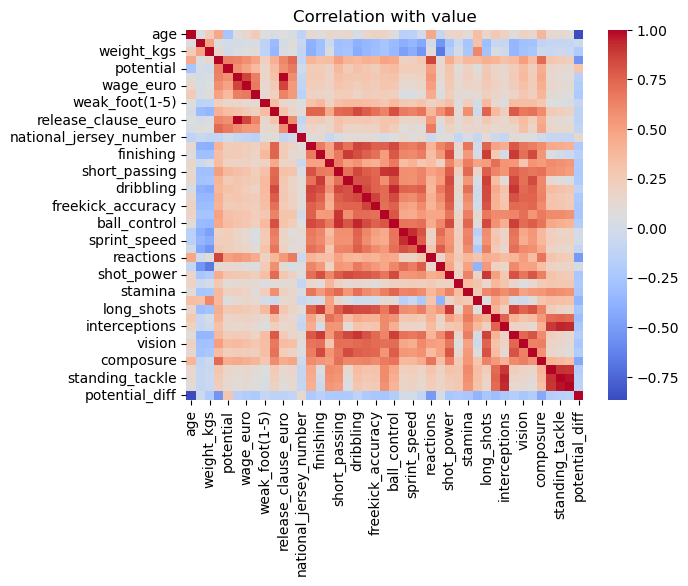

In [14]:
##correlation value_euros
import seaborn as sns
import matplotlib.pyplot as plt

correlation = df.corr(numeric_only=True)['value_euro'].sort_values(ascending=False)
print(correlation.head(10))

# Optional plot
sns.heatmap(df.corr(numeric_only=True), cmap='coolwarm')
plt.title("Correlation with value")
plt.show()

In [15]:
##Drop high-correlation leaker
df.drop(columns=['release_clause_euro'],inplace=True)

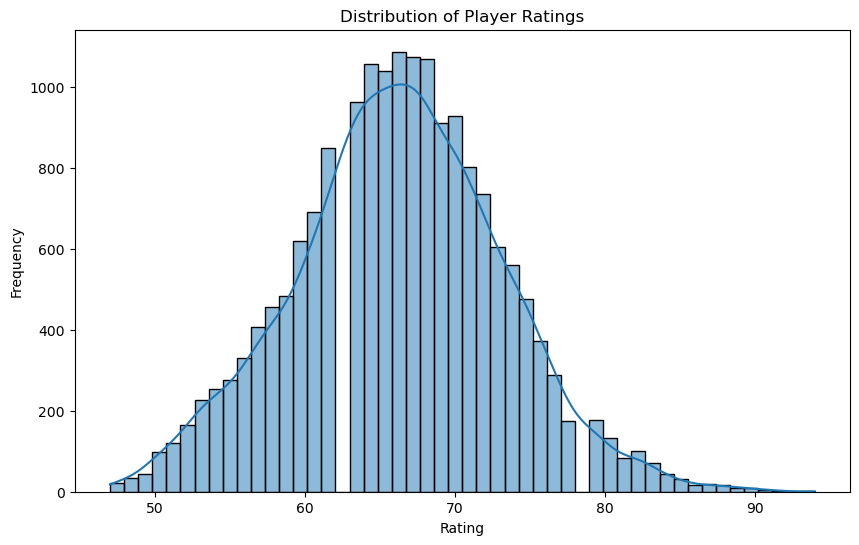

In [16]:
###Visualization¶
plt.figure(figsize=(10, 6))
sns.histplot(data=df['overall_rating'], bins=50, kde = True)
plt.title('Distribution of Player Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

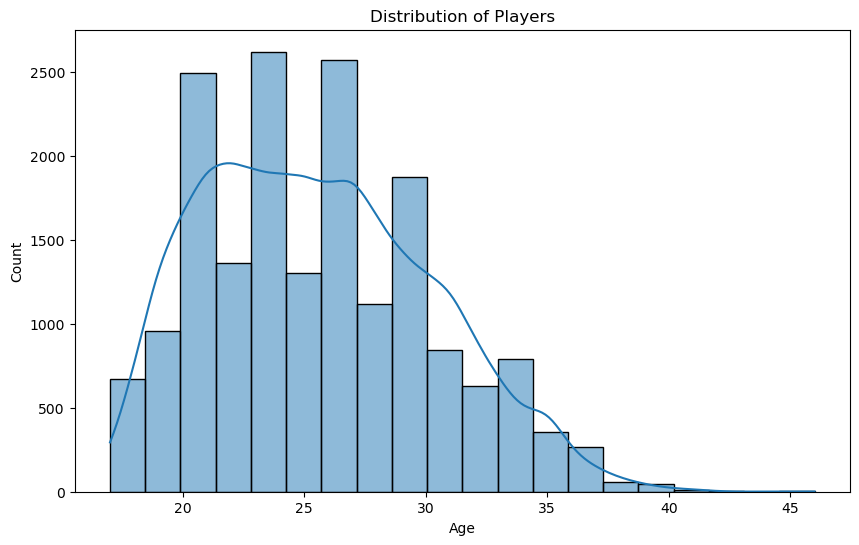

In [18]:
plt.figure(figsize=(10, 6))
sns.histplot(df['age'],bins=20,kde=True)
plt.title('Distribution of Players')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()